# Сравнение тарифов оператора сотовой связи

# Содержание

- [Описание проекта](#1)
- [Общая информация о данных](#2)
- [Подготовка данных](#3)
- [Анализ данных](#4)
- [Проверка гипотез](#5)
- [Заключение](#6)

# Описание проекта <a id='1'></a>

**Цель: Установить, какой тариф приносит больше денег.**

На основе данных о 500 пользователях оператора сотовой связи определить какой тариф приносит больше денег.


# Общая информация о данных <a id='2'></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math

calls = pd.read_csv('calls.csv', sep=',')
internet = pd.read_csv('internet.csv', sep=',')
messages = pd.read_csv('messages.csv', sep=',')
tariffs = pd.read_csv('tariffs.csv', sep=',')
users = pd.read_csv('users.csv', sep=',')

calls.info()
display(calls.head())

internet.info()
display(internet.head())

messages.info()
display(messages.head())

tariffs.info()
display(tariffs.head())

users.info()
display(users.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


По результатам ознакомления с базами данных, стоит отметить практически полное отсутствие незаполненных записей (это хорошо).

Посмотрим содержание ячеек в, малозаполненном, столбце churn_date. 

In [3]:
df_users = users.sort_values(by='churn_date', ascending=False) 
display(df_users.head(40))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
399,1399,31,2018-12-25,Уфа,Алиса,Абрашина,2018-11-06,ultra
438,1438,24,2018-12-24,Екатеринбург,Нателла,Бородина,2018-10-05,smart
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
242,1242,39,2018-12-21,Хабаровск,Радим,Федосеев,2018-11-18,smart
422,1422,60,2018-12-21,Москва,Клара,Устинова,2018-10-12,smart
206,1206,35,2018-12-20,Москва,Елена,Шарапова,2018-11-03,smart
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
163,1163,21,2018-12-16,Москва,Лев,Вишневский,2018-11-03,smart


Подавляющее большинство абонентов пользовались тарифом более половины года, - оставим все строки в датафрэйме.


Проверим данные на наличие явных дубликатов, проверим наличие "вбросов". Посмотрим как распределены данные.

In [4]:

calls = calls.drop_duplicates().reset_index(drop=True)
internet = internet.drop_duplicates().reset_index(drop=True)
messages = messages.drop_duplicates().reset_index(drop=True)
users = users.drop_duplicates().reset_index(drop=True)

calls.info()
internet.info()
messages.info()
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 co

Дубликатов в данных не обнаружено.

Text(0.5, 1.0, 'Длительность разговора, мин')

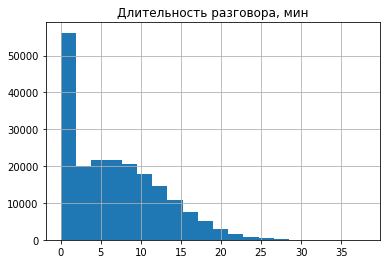

In [5]:
calls['duration'].hist(bins=20)
plt.title('Длительность разговора, мин')

Нулями обозначены пропущенные звонки, поэтому их не удаляем. Длительность разговоров не превышает 40 минут, подозрительно длинных звонков нет.

Text(0.5, 1.0, 'Интернет трафик, мб')

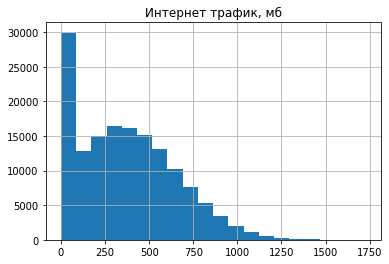

In [6]:
internet['mb_used'].hist(bins=20)
plt.title('Интернет трафик, мб')

Нулями вероятно обозначены несостоявшиеся сессии, поэтому их не удаляем. Израсходованный трафик за сессию не превышает 1750 мб, подозрительно длинных сессий нет.


Pаменим тип данных в колонках с датами на соответствующий ему - dt. Добавим колонки с месяцем оказанной услуги.

In [7]:
calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d')

calls['month'] = calls['call_date'].dt.month


internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d')

internet['month'] = internet['session_date'].dt.month


messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d')

messages['month'] = messages['message_date'].dt.month


# Подготовка данных <a id='3'></a>

Составим алгорим работы с данными. 
- в соответствии с условиями оператора связи, рассчитаем целочисленные округлённые в большую сторону значения затраченных на разговоры минут, отправленных СМС, израсходованного интернет трафика;
- выделим отдельные столбцы с месяцем в котором была оказана услуга;
- составим сводные таблицы user_id и сумм помесячного использования услуг (звонков, смс, интернет);
- объеденим таблицы по пользователю и месяцу;
- объединим общую таблицу с данными о тарифах;
- рассчитаем стоимость оказанных услуг.

In [8]:

calls['duration_int'] = np.ceil(calls['duration']).astype('int')

calls_in_month = calls.pivot_table(index=['user_id', 'month'], values='duration_int', aggfunc=['sum', 'count'])

calls_in_month.columns = ['call_sum', 'call_count']



In [9]:

messages_in_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])

messages_in_month.columns = ['messages_count']


In [10]:

internet['gb_used'] = np.ceil(internet['mb_used'] / 1024).astype('int')

internet_in_month = internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc=['sum'])

internet_in_month.columns = ['internet_sum']


In [11]:
users_interval = pd.merge(messages_in_month, calls_in_month, on=['user_id', 'month'], how='outer')
users_interval = pd.merge(users_interval, internet_in_month, on=['user_id', 'month'], how='outer')
users_interval_reset_index = users_interval.reset_index() 

users_full = pd.merge(users_interval_reset_index, users, on=['user_id'], how='left')


Заменим пропущенные значения на "0".

In [12]:
users_full=users_full.fillna(0)

Периеименуем столбец 'tariff' в 'tariff_name' и объединим исходную таблицу с данными о тарифах.

In [13]:
users_full.rename(columns = {'tariff' : 'tariff_name'}, inplace = True)

In [14]:
users_full = pd.merge(users_full, tariffs, on=['tariff_name'], how='outer')

Рассчитаем превышение включённых в тариф услуг. Обнулим отрицательные ("недоиспользованные") значения.

In [15]:
users_full['extra_minutes_1'] = users_full['call_sum'] - users_full['minutes_included']
users_full['extra_messages_1'] = users_full['messages_count'] - users_full['messages_included']
users_full['extra_internet_1'] = users_full['internet_sum'] - users_full['mb_per_month_included'] / 1024

In [16]:
users_full['extra_minutes'] = users_full['extra_minutes_1'].clip(0)
users_full['extra_messages'] = users_full['extra_messages_1'].clip(0)
users_full['extra_internet'] = users_full['extra_internet_1'].clip(0)


Рассчитаем стоимость оказанных дополнительных услуг каждому абоненту в месяц. Общую стоимость услуги для каждого абонента в месяц.

In [17]:
users_full['cost_minutes'] = users_full['extra_minutes'] * users_full['rub_per_minute']
users_full['cost_messages'] = users_full['extra_messages'] * users_full['rub_per_message']
users_full['cost_internet'] = users_full['extra_internet'] * users_full['rub_per_gb']
users_full['cost_total'] = users_full['cost_minutes'] + users_full['cost_messages'] + users_full['cost_internet'] + users_full['rub_monthly_fee']

users_full.head()


,user_id,month,messages_count,call_sum,call_count,internet_sum,age,churn_date,city,first_name,...,extra_minutes_1,extra_messages_1,extra_internet_1,extra_minutes,extra_messages,extra_internet,cost_minutes,cost_messages,cost_internet,cost_total
0,1000,5,22.0,159.0,22.0,4.0,52,0,Краснодар,Рафаил,...,-2841.0,-978.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,60.0,172.0,43.0,49.0,52,0,Краснодар,Рафаил,...,-2828.0,-940.0,19.0,0.0,0.0,19.0,0.0,0.0,2850.0,4800.0
2,1000,7,75.0,340.0,47.0,28.0,52,0,Краснодар,Рафаил,...,-2660.0,-925.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,81.0,408.0,52.0,27.0,52,0,Краснодар,Рафаил,...,-2592.0,-919.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,57.0,466.0,58.0,26.0,52,0,Краснодар,Рафаил,...,-2534.0,-943.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0


**Выводы**

По результатам подготовки данных для каждого пользователя рассчитаны:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка (общая и в разрезе каждой услуги) в соответствии с тарифным планом.

# Анализ данных <a id='4'></a>

Построим сводные таблицы с помесячными данными (величиной оказанной услуги, количеством пользователей, средним значением, дисперсией, и стандартным отклонением) в разрезе каждой услуги для каждого из тарифов.

In [18]:
calls_in_tariffs = users_full.pivot_table(index=['month'], columns='tariff_name', values='call_sum', aggfunc=['sum', 'count', 'mean', 'var', 'std'])
calls_in_tariffs

sum          count              mean              \
tariff_name     smart    ultra smart ultra       smart       ultra   
month                                                                
1              6931.0   3853.0    34     9  203.852941  428.111111   
2             17324.0   7131.0    58    24  298.689655  297.125000   
3             30034.0  18117.0    77    37  390.051948  489.648649   
4             41119.0  25191.0   112    55  367.133929  458.018182   
5             54618.0  34192.0   141    67  387.361702  510.328358   
6             64885.0  40295.0   164    84  395.640244  479.702381   
7             82079.0  49667.0   201    91  408.353234  545.791209   
8             99045.0  54653.0   235   107  421.468085  510.775701   
9            111439.0  62036.0   260   115  428.611538  539.443478   
10           125284.0  68644.0   294   123  426.136054  558.081301   
11           137544.0  72545.0   316   134  435.265823  541.380597   
12           161275.0  82400.0   337   139  478.560831  592.805755   

                      var                        std              
tariff_name         smart          ultra       smart       ultra  
month                                                             
1            23787.341355   72769.361111  154.231454  269.757968  
2            36412.287961   87919.679348  190.820041  296.512528  
3            36823.155161  111384.900901  191.893604  333.743765  
4            34778.207127   71653.870034  186.489161  267.682405  
5            34820.061094   83870.193578  186.601343  289.603511  
6            30742.918861   91535.946500  175.336587  302.549081  
7            32250.269602   94322.278144  179.583601  307.119322  
8            34793.583379   97956.496385  186.530382  312.980026  
9            33535.342723  105716.775286  183.126576  325.141162  
10           35392.336375  106464.583500  188.128510  326.289110  
11           31605.237050   96570.057064  177.778618  310.757232  
12           39698.622033  117276.331561  199.245131  342.456321

Из данных таблицы видно, что количество израсходованных минут с 1 по 12 месяц увеличивается, что объясняется помесячным "приростом" абонентов, - среднее значение минут за месяц также увеличивается. Общее количество минут в месяц почти в 2 раза больше для тарифного плана smart (за счет большего к-ва абонентов), - среднее за месяц больше для тарифного плана ultra. Стоит отметить значительное отличие дисперсий и стандартных отклонений, значительно боьшие значения соответсвуют тарифному плану ultra, что указывает на больший разброс данных в данном тарифном плане.

In [19]:
messages_in_tariffs = users_full.pivot_table(index=['month'], columns='tariff_name', values='messages_count', aggfunc=['sum', 'count', 'mean', 'var', 'std'])
messages_in_tariffs


sum         count             mean                    var  \
tariff_name    smart   ultra smart ultra      smart      ultra       smart   
month                                                                        
1              620.0   304.0    34     9  18.235294  33.777778  262.367201   
2             1397.0   527.0    58    24  24.086207  21.958333  473.097701   
3             2453.0  1195.0    77    37  31.857143  32.297297  718.492481   
4             3443.0  1736.0   112    55  30.741071  31.563636  602.139559   
5             4762.0  2536.0   141    67  33.773050  37.850746  730.990983   
6             5478.0  3505.0   164    84  33.402439  41.726190  806.806374   
7             6784.0  4536.0   201    91  33.751244  49.846154  799.887811   
8             7905.0  5183.0   235   107  33.638298  48.439252  838.257501   
9             8746.0  6013.0   260   115  33.638462  52.286957  790.617820   
10            9927.0  7187.0   294   123  33.765306  58.430894  816.111966   
11           10768.0  7476.0   316   134  34.075949  55.791045  805.937071   
12           12130.0  8425.0   337   139  35.994065  60.611511  934.952346   

                                std             
tariff_name        ultra      smart      ultra  
month                                           
1             940.694444  16.197753  30.670742  
2             716.824275  21.750809  26.773574  
3            1732.381381  26.804710  41.621886  
4            1407.287542  24.538532  37.513831  
5            1624.644052  27.036845  40.306874  
6            1986.297619  28.404337  44.567899  
7            2372.042735  28.282288  48.703621  
8            2171.739199  28.952677  46.601923  
9            2152.855530  28.117927  46.398874  
10           2697.181661  28.567673  51.934398  
11           2476.948491  28.389031  49.768951  
12           2681.978417  30.576990  51.787821

Из данных таблицы видно, что количество отправленных СМС с 1 по 12 месяц увеличивается, что объясняется помесячным "приростом" абонентов, - среднее значение минут за месяц также увеличивается. Общее количество СМС в месяц больше для тарифного плана smart (за счет большего к-ва абонентов), - среднее за месяц больше для тарифного плана ultra. Стоит отметить значительное отличие дисперсий и стандартных отклонений, значительно боьшие значения соответсвуют тарифному плану ultra, что указывает на больший разброс данных в данном тарифном плане.

In [20]:
internet_in_tariffs = users_full.pivot_table(index=['month'], columns='tariff_name', values='internet_sum', aggfunc=['sum', 'count', 'mean', 'var', 'std'])
internet_in_tariffs


sum         count             mean                    var  \
tariff_name    smart   ultra smart ultra      smart      ultra       smart   
month                                                                        
1              733.0   245.0    34     9  21.558824  27.222222  237.163102   
2             1726.0   574.0    58    24  29.758621  23.916667  245.730188   
3             3070.0  1267.0    77    37  39.870130  34.243243  234.825017   
4             3976.0  1826.0   112    55  35.500000  33.200000  221.837838   
5             5810.0  2557.0   141    67  41.205674  38.164179  222.907396   
6             6748.0  3111.0   164    84  41.146341  37.035714  197.659434   
7             8344.0  3668.0   201    91  41.512438  40.307692  227.171095   
8            10199.0  4078.0   235   107  43.400000  38.112150  200.164103   
9            11117.0  4334.0   260   115  42.757692  37.686957  167.697817   
10           12871.0  4812.0   294   123  43.778912  39.121951  221.223991   
11           14033.0  5204.0   316   134  44.408228  38.835821  193.035996   
12           15923.0  5916.0   337   139  47.249258  42.561151  202.199590   

                               std             
tariff_name       ultra      smart      ultra  
month                                          
1            222.444444  15.400101  14.914572  
2            429.384058  15.675783  20.721584  
3            462.078078  15.324001  21.496001  
4            361.125926  14.894222  19.003314  
5            384.412031  14.930084  19.606428  
6            345.070998  14.059141  18.576087  
7            360.482051  15.072196  18.986365  
8            416.553342  14.147936  20.409638  
9            345.971320  12.949819  18.600304  
10           351.681727  14.873600  18.753179  
11           365.611940  13.893739  19.120982  
12           405.740799  14.219690  20.143009

Из данных таблицы видно, что объём израсходованного трафика с 1 по 12 месяц увеличивается, что объясняется помесячным "приростом" абонентов, - средний объём израсходованного трафика за месяц также увеличивается. Общий и средний объём израсходованного трафика в месяц больше для тарифного плана smart. Стоит отметить значительное отличие дисперсий и стандартных отклонений, значительно боьшие значения соответсвуют тарифному плану ultra, что указывает на больший разброс данных в данном тарифном плане.

Посмотрим на превышение включённых услуг в разрезе тарифных планов.

In [21]:
extra_servis_in_tariffs = users_full.pivot_table(index=['month'], columns='tariff_name', values=['extra_minutes', 'extra_internet', 'extra_messages'], aggfunc=['mean'])
extra_servis_in_tariffs

mean                                                    
            extra_internet            extra_messages       extra_minutes      
tariff_name          smart      ultra          smart ultra         smart ultra
month                                                                         
1                 9.794118   4.111111       0.705882   0.0      1.500000   0.0
2                16.396552   6.458333       1.844828   0.0     14.827586   0.0
3                25.168831  11.756757       5.012987   0.0     34.493506   0.0
4                21.214286   9.545455       3.669643   0.0     26.883929   0.0
5                26.765957  12.358209       5.347518   0.0     27.510638   0.0
6                26.451220  11.523810       5.670732   0.0     29.408537   0.0
7                26.965174  13.593407       5.786070   0.0     34.452736   0.0
8                28.587234  12.803738       6.255319   0.0     40.680851   0.0
9                27.973077  12.113043       5.684615   0.0     43.015385   0.0
10               29.125850  12.894309       5.993197   0.0     44.309524   0.0
11               29.579114  12.731343       6.155063   0.0     43.848101   0.0
12               32.278932  15.827338       7.412463   0.0     67.973294   0.0

Из таблицы видно, что в среднем абоненты тарифного плана smart превышают установленные лимиты по всем услугам, что определенно выгодно оператору услуг. 
Интересен факт, что при этом для абонентов тарифного плана smart превышение по к-ву минут и СМС в среднем приводит примерно к дополнительным затратам от 6 до 220 рублей, а превышение трафика - от 2000 до 6400 рублей, что дает среднюю стоимость услуги с учетом ежемесячной оплаты от 2560 до 7200 рублей в месяц. При этом для тарифного плана ultra общая стоимость услуги в месяц составляет примерно от 2500 до 4300 рублей.
Располагая приведенными данными, многие абоненты тарифа smart вряд ли повторили свой выбор, несмотря на более высокую абонентскую плату тарифа ultra.

Рассчитаем среднее значение, дисперсию, стандартное отклонение общей стоимости услуг в разрезе тарифных планов.

In [22]:
cost_total_in_tariffs = users_full.pivot_table(index=['tariff_name'], values='cost_total', aggfunc=['mean', 'var', 'std'])
cost_total_in_tariffs

,mean,var,std
,cost_total,cost_total,cost_total
tariff_name,,,
smart,6247.084343,8.373601e+06,2893.717526
ultra,3844.416244,4.692159e+06,2166.139153


Из таблицы видно, что средняя стоимость услуг тарифа smart в 1,6 раза больше чем стоимость услуг тарифа ultra. При этом также для тарифа smart величина дисперсии и стандартного отклонения также больше, что указывает на больший разброс данных в этом тарифном плане.

Постром гистограммы и опишем распределения для каждого тарифного плана.

Text(0.5, 1.0, 'Гистограмма распределения общей выручки тарифа "Ультра"')

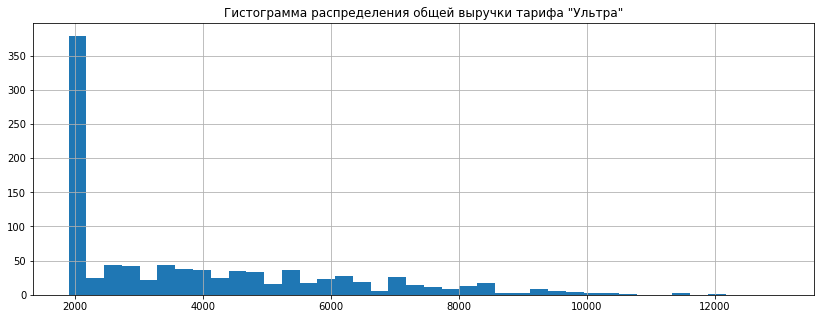

In [23]:
cost_ultra = users_full.query('tariff_name == "ultra"')
cost_ultra['cost_total'].hist(bins=40, range=(1900, 13000), figsize = (14, 5))
plt.title('Гистограмма распределения общей выручки тарифа "Ультра"')


Без явного пика в районе 2000 рублей (значение близко к месячной абонентской плате, очевидно что в этом диапазоне абоненты не превышают лимитов тарифного плана) распределение близко к распеределению Пуасонна.

Text(0.5, 1.0, 'Гистограмма распределения общей выручки тарифа "Смарт"')

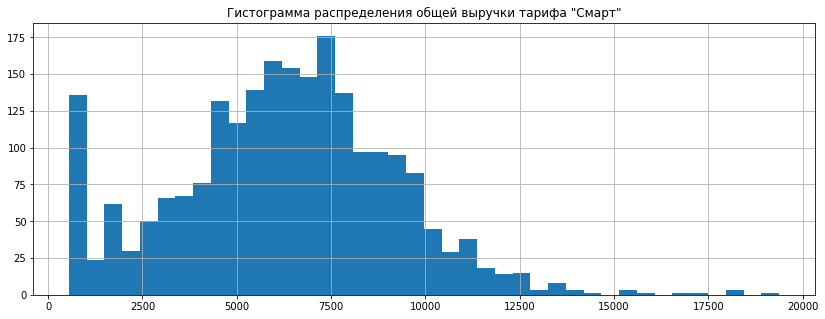

In [24]:
# plot(y = 'median_time', kind='bar', figsize = (10, 5), grid=True) 
# users_full.pivot_table(index=['tariff_name'], values='cost_total').plot(kind='hist', figsize = (10, 5), grid=True)

cost_smart = users_full.query('tariff_name == "smart"')
cost_smart['cost_total'].hist(bins=40, figsize = (14, 5))
plt.title('Гистограмма распределения общей выручки тарифа "Смарт"')


Без явного пика в районе 500 рублей (значение близко к месячной абонентской плате, очевидно что в этом диапазоне абоненты не превышают лимитов тарифного плана) распределение близко к нормальному.

# Проверка гипотез <a id='5'></a>

Выдвинем нулевую гипотезу о равенстве средних выручек пользователей тарифов «Ультра» и «Смарт», альтернативная гипотеза - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.
Для проверки используем специальный метод scipy.stats.ttest_ind (благодаря ЦПТ этот метод можно применить, - если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности; это утверждение верно, даже если сама генеральная совокупность не распределена нормально). Учитывая значительное отличие дисперсий, укажем equal_var = False. Критический уровень статистической значимости примем равным 0,05, если p-value окажется меньше него - отвергнем гипотезу

In [25]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    cost_smart['cost_total'], 
    cost_ultra['cost_total'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезую. Средние выручки пользователей тарифов «Ультра» и «Смарт» равны.") 

p-значение: 3.366123216919648e-132
Отвергаем нулевую гипотезу. Средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.


Выдвинем нулевую гипотезу о равенстве средней выручки пользователей из Москвы  от выручки пользователей из других регионов, альтернативная гипотеза - средняя выручка пользователей из Москвы  и выручка пользователей из других регионов не равны.

In [26]:
cost_moskow = users_full.query('city == "Москва"')
cost_another = users_full.query('city != "Москва"')

In [27]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    cost_moskow['cost_total'], 
    cost_another['cost_total'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя выручка пользователей из Москвы и выручка пользователей из других регионов не равны.")
else:
    print("Не получилось отвергнуть нулевую гипотезую. Средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны.") 

p-значение: 0.25438147756433416
Не получилось отвергнуть нулевую гипотезую. Средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны.


# Заключение <a id='6'></a>

По результатам анализа данных установлено:
- что количество израсходованных минут с 1 по 12 месяц увеличивается, что объясняется помесячным "приростом" абонентов, - среднее значение минут за месяц также увеличивается. Общее количество минут в месяц почти в 2 раза больше для тарифного плана smart (за счет большего к-ва абонентов), - среднее за месяц больше для тарифного плана ultra. Отмечено значительное отличие дисперсий и стандартных отклонений, большие значения соответсвуют тарифному плану ultra, что указывает на больший разброс данных в данном тарифном плане.
-  что количество отправленных СМС с 1 по 12 месяц увеличивается, что объясняется помесячным "приростом" абонентов, - среднее значение минут за месяц также увеличивается. Общее количество СМС в месяц больше для тарифного плана smart (за счет большего к-ва абонентов), - среднее за месяц больше для тарифного плана ultra. Отмечено значительное отличие дисперсий и стандартных отклонений, большие значения соответсвуют тарифному плану ultra, что указывает на больший разброс данных в данном тарифном плане.
- что объём израсходованного трафика с 1 по 12 месяц увеличивается, что объясняется помесячным "приростом" абонентов, - средний объём израсходованного трафика за месяц также увеличивается. Общий и средний объём израсходованного трафика в месяц больше для тарифного плана smart. Отмечено значительное отличие дисперсий и стандартных отклонений, большие значения соответсвуют тарифному плану ultra, что указывает на больший разброс данных в данном тарифном плане.
- что средняя стоимость услуг тарифа smart в 1,6 раза больше чем стоимость услуг тарифа ultra. При этом также для тарифа smart величина дисперсии и стандартного отклонения также больше, что указывает на больший разброс данных в этом тарифном плане.


По результатам проверки гипотез определено, что:


- средние выручки пользователей тарифов «Ультра» и «Смарт» различаются, p-значение: 3.366e-132 << 0,05.
- cредняя выручка пользователей из Москвы и выручка пользователей из других регионов равны, p-значение: 0.254 > 0,05.

На основе проверки гипотез и расчитанных статистик можно сделать вывод, что тариф «Смарт» приносит больше денег (в дополнительном исследовании показано за счет чего).